In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
from collections import Counter

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


-
- Year: Год выпуска или производства
- Model: Название или код модели автомобиля
- Car/Suv: Тип автомобиля (легковой автомобиль или внедорожник)
- Title: Название или описание автомобиля
- UsedOrNew: Состояние автомобиля (б/у или новый)
- Transmission: Тип трансмиссии (механическая или автоматическая)
- Engine: Объем двигателя или мощность (в литрах или киловаттах)
- DriveType: Тип привода (передний, задний или полный)
- FuelType: Тип топлива (бензин, дизель, гибрид или электричество)
- FuelConsumption: Потребление топлива (в литрах на 100 км)
- Kilometres: Пробег автомобиля (в километрах)
- ColourExtInt: Цвет автомобиля (внешний и внутренний)
- Location: Местонахождение автомобиля (город и штат)
- CylindersinEngine: Количество цилиндров в двигателе
- BodyType: Форма или стиль кузова автомобиля (седан, хэтчбек, купе и т.д.)
- Doors: Количество дверей в автомобиле
- Seats: Количество сидений в автомобиле

In [175]:
DATA_PATH ='../dataset/Australian_Vehicle_Prices.csv'

In [176]:
df = pd.read_csv(DATA_PATH)

In [177]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


Посмотрю сначала на то, какой размерности датасет, есть ли пропущенные значения в нем

In [179]:
df.shape

(16734, 19)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

Видно, что все признаки кроме одного числового - категориалные 

Рассмторим есть ли пропущенные значения в датасете 

In [183]:
pd.DataFrame(zip(df.isna().sum(),100 * (df.isna().sum()/df.shape[0])),columns=['Количество пропущенных значений','Процент от общего числа строк (%)'], index=df.columns)

,Количество пропущенных значений,Процент от общего числа строк (%)
Brand,1,0.005976
Year,1,0.005976
Model,1,0.005976
Car/Suv,28,0.167324
Title,1,0.005976
UsedOrNew,1,0.005976
Transmission,1,0.005976
Engine,1,0.005976
DriveType,1,0.005976
FuelType,1,0.005976


- Видно, что в каждый из признаков исходного датасета содержит пропущенные значения
- Можно выделить признаки Doors, Seats как те, которые содержат большое количество пропущенных значений (около 10 процентов от датасета)

Посмотрю теперь сумму пропущенных значений по строкам датасета 

In [186]:
missing_counts = df.isna().sum(axis=1)
missing_counts.sort_values(ascending=False)

2391     19
15802     4
15357     4
15351     4
15343     4
         ..
5905      0
5906      0
5907      0
5908      0
16733     0
Length: 16734, dtype: int64

- Вижу, что есть строка у которой пропущеннs все значения 
- Ее можно удалить , с остальными пропущенными значениями разбираться отдельно

In [188]:
df.iloc[2391]

Brand                NaN
Year                 NaN
Model                NaN
Car/Suv              NaN
Title                NaN
UsedOrNew            NaN
Transmission         NaN
Engine               NaN
DriveType            NaN
FuelType             NaN
FuelConsumption      NaN
Kilometres           NaN
ColourExtInt         NaN
Location             NaN
CylindersinEngine    NaN
BodyType             NaN
Doors                NaN
Seats                NaN
Price                NaN
Name: 2391, dtype: object

In [189]:
df = df.drop(2391)

Количество строк в датасете которые содержат хотя бы одно пропущенное значение

In [191]:
df[df.isna().sum(axis=1) > 0].shape[0]

2147

- Теперь, после проверки датасета на наличие явно неадекватных строк (все значения в строке пропущены)
Удаление которых не создает для нас никакого data leak 
Приступаем к разделению данных на обучающ и и тестовые
и только после этого на обучающем множестве начинаем обработку данных 

In [193]:
RANDOM_STATE = 42

In [194]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE)

- Рассмотрим переменную Brand. Еще раз проверим на наличие пропущенных значений.

In [196]:
train_df = df_train.copy()
train_df.Brand.isna().any()

False

In [197]:
train_df[train_df.Brand == '-']

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price


Пропущенных значений нет рассмотрим теперь количнство примеров для каждой из возможных категорий бренда

Видно, что есть категории содержащии большое количество примеров , а есть и набор

In [200]:
brand_counts = train_df.Brand.value_counts()
brand_counts

Brand
Toyota         2202
Hyundai         985
Mazda           940
Holden          855
Nissan          852
               ... 
Rolls-Royce       1
Datsun            1
Polestar          1
Packard           1
Lamborghini       1
Name: count, Length: 75, dtype: int64

- Рассмотррим без лейблов и процентов (чтобы не наслаивалось)  как примерно выглядит набор категорий на круговой диаграмме, чтобы иметь представление в целом

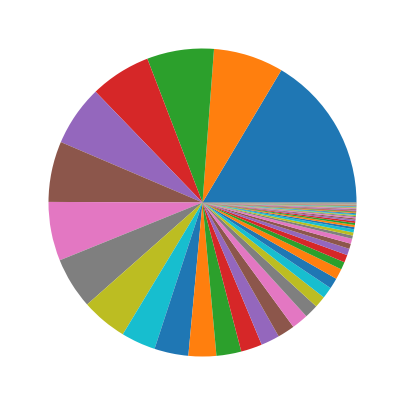

In [202]:
plt.figure(figsize=(15,5))
plt.pie(brand_counts)
plt.show()

- Видно, что есть большое количество категорий , имеющих маленькое количество примеров в датасеете, скорее всего часть таких "одиночек" попали и в валиадационную и тестовую выборку 

- Требуется создать новую категорию Other, куда собрать категории имеющих малое количесвто примеров в датасете. Однако точно сказать какой порог оптимален нельзя. Нужно будет подобрать на валидационной выборке оптимальное значение параметра который оприделяет порог разбиения.

Рассмотрим зависимую переменную Price

In [206]:
train_df.Price.isna().any()

True

In [207]:
train_df.Price.info()

<class 'pandas.core.series.Series'>
Index: 13386 entries, 7594 to 15796
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
13385 non-null  object
dtypes: object(1)
memory usage: 209.2+ KB


In [208]:
train_df.Price.head()

7594     30990
10634    14999
4411     29995
12403    29999
9982     23750
Name: Price, dtype: object

Виден тип данных object, хотя судя по всему должен быть int/float
Проверим все ли значения могут быть числовыми

In [210]:
numeric_values = pd.to_numeric(train_df.Price, errors='coerce')
non_numeric_mask = pd.isnull(numeric_values)  
non_numeric_values = train_df.Price[non_numeric_mask]
non_numeric_values

16424    POA
15955    POA
16366    POA
15310    POA
16379    POA
16478    POA
16314    POA
15322    POA
15909    POA
11039    NaN
16153    POA
16156    POA
16399    POA
16095    POA
15787    POA
15397    POA
16252    POA
15686    POA
15688    POA
16310    POA
15662    POA
16482    POA
16278    POA
16347    POA
16012    POA
16063    POA
15695    POA
16597    POA
16300    POA
16051    POA
16374    POA
16144    POA
15782    POA
16353    POA
16245    POA
15329    POA
16313    POA
15266    POA
Name: Price, dtype: object

Видим одно и тоже значение - POA. В гугле говорится что это значит - цена доступна при обращении  

In [212]:
non_numeric_values.shape

(38,)

Строки с таким значением целевой перменной можно удалить 

In [214]:
train_df = train_df.drop(non_numeric_values.index)

train_df['Price'] = train_df['Price'].astype(float)

In [215]:
train_df['Price'].describe()

count    1.334800e+04
mean     3.725519e+04
std      3.714690e+04
min      8.800000e+01
25%      1.899900e+04
50%      2.950000e+04
75%      4.399000e+04
max      1.500000e+06
Name: Price, dtype: float64

Text(0.5, 0, 'Price')

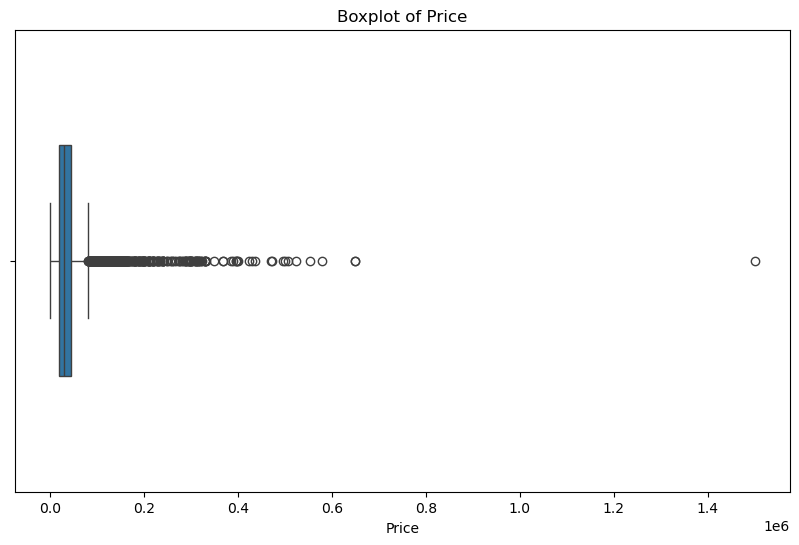

In [216]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Price', data=train_df, width=0.5)

plt.title('Boxplot of Price')
plt.xlabel('Price')

Видно что есть выбросы , в частоности один с очень большой ценой 

In [218]:
Q1 = train_df['Price'].quantile(0.05)
Q3 = train_df['Price'].quantile(0.95)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_df = train_df[(train_df['Price'] >= lower_bound) & (train_df['Price'] <= upper_bound)]

In [219]:
train_df

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
7594,Mazda,2019.0,3,USED Dealer ad,2019 Mazda 3,USED,Automatic,-,Front,Unleaded,-,18664,Red / 2019/05,"Dandenong South, VIC",-,NaN,NaN,NaN,30990.0
10634,Mazda,2018.0,2,Hatchback,2018 Mazda 2 Maxx,USED,Automatic,"4 cyl, 1.5 L",Front,Unleaded,4.9 L / 100 km,23600,White / -,"Archerfield, QLD",4 cyl,Hatchback,5 Doors,5 Seats,14999.0
4411,Ford,2017.0,Ranger,Ute / Tray,2017 Ford Ranger XL 2.2 HI-Rider (4X2),USED,Automatic,"4 cyl, 2.2 L",Rear,Diesel,7.5 L / 100 km,219442,White / Grey,"Minchinbury, NSW",4 cyl,Ute / Tray,4 Doors,5 Seats,29995.0
12403,LDV,2020.0,V80,Qld 4x4 Pty Ltd,2020 LDV V80 HIGH ROOF LONG WHEEL,USED,Automatic,-,Other,Diesel,-,61972,White / -,"Baringa, QLD",-,Commercial,NaN,NaN,29999.0
9982,Hyundai,2019.0,I30,Hatchback,2019 Hyundai I30 Active,USED,Automatic,"4 cyl, 2 L",Front,Unleaded,7.4 L / 100 km,63396,Red / Black,"Elsternwick, VIC",4 cyl,Hatchback,4 Doors,5 Seats,23750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,Lexus,2014.0,IS300H,Sedan,2014 Lexus IS300H Luxury Hybrid,USED,Automatic,"4 cyl, 2.5 L",Rear,Hybrid,4.9 L / 100 km,69839,Silver / Beige,"Hoppers Crossing, VIC",4 cyl,Sedan,4 Doors,5 Seats,35990.0
11965,Hyundai,2013.0,Elantra,08 **** ****\n,2013 Hyundai Elantra MD,USED,-,-,Front,-,-,155815,- / -,"Blair Athol, SA",-,NaN,NaN,NaN,9999.0
5391,LDV,2021.0,T60,Ute / Tray,2021 LDV T60 PRO (4X4),USED,Automatic,"4 cyl, 2.8 L",4WD,Diesel,8.5 L / 100 km,29876,Grey / -,"West Ryde, NSW",4 cyl,Ute / Tray,4 Doors,5 Seats,28388.0
860,Mazda,2014.0,3,Sedan,2014 Mazda 3 NEO,USED,Manual,"4 cyl, 2 L",Front,Unleaded,5.8 L / 100 km,148421,Silver / Black,"Minchinbury, NSW",4 cyl,Sedan,4 Doors,5 Seats,14880.0


- Рассмотрим переменную Year

In [221]:
train_df[train_df.Year == '-']

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price


In [222]:
count_year = train_df.Year.value_counts().sort_index()

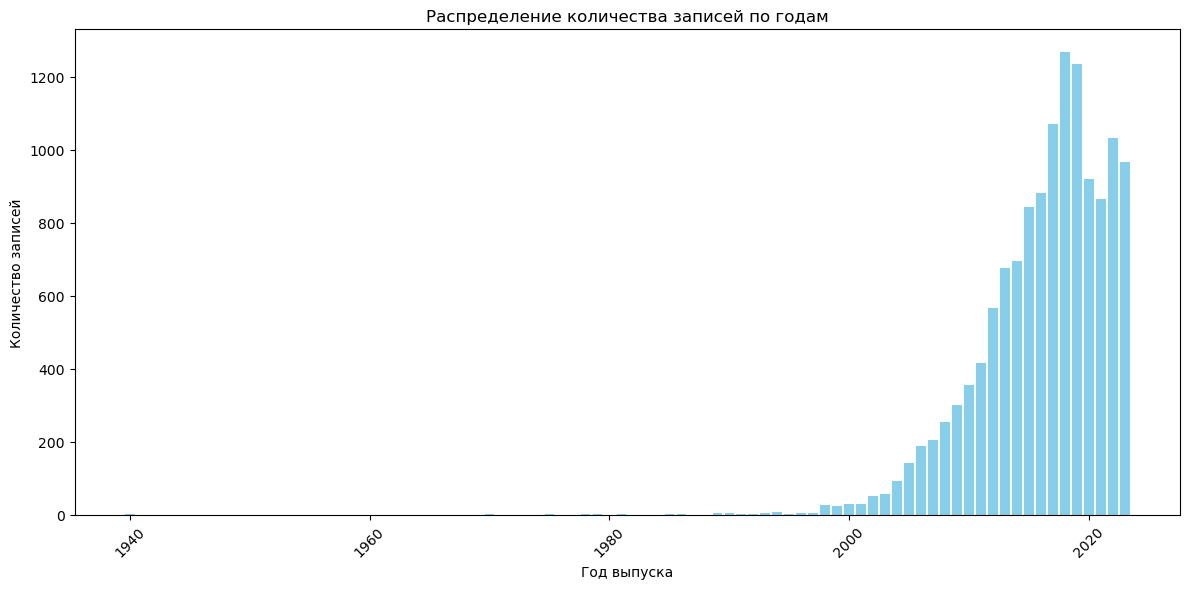

In [223]:
plt.figure(figsize=(12, 6))
plt.bar(count_year.index, count_year.values, color='skyblue')
plt.xlabel('Год выпуска')
plt.ylabel('Количество записей')
plt.title('Распределение количества записей по годам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Истерсно что ярко выражен спад количеств записей с машинами годом выпуска 2020 и 2021 годы - в это время была эпижемия covid, разрыв цепочек и заводы выпустили мало авто

Оставим его использование напрямую как числвого признака , как тенденцию влияния старости или новизны на целевую переменную

Model

In [227]:
train_df[train_df.Model == '-']

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price


In [228]:
model_counts = df.Model.value_counts()
model_counts

Model
Hilux          430
Corolla        405
Ranger         398
Landcruiser    370
I30            366
              ... 
Celerio          1
R-Class          1
Vectra           1
ES300            1
120              1
Name: count, Length: 781, dtype: int64

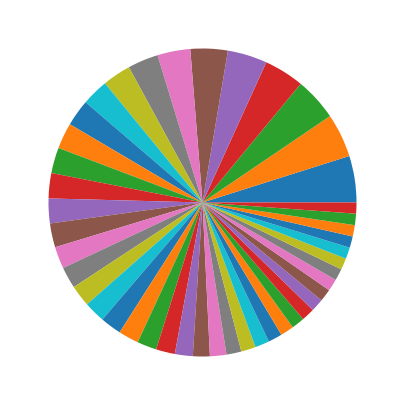

In [229]:
plt.figure(figsize=(15,5))
plt.pie(model_counts[model_counts>100])
plt.show()

Переменная Car/Suv содержит много данных которые зашумлены , встречаются как названия автосалонов , так и просто набор символов (*****) (похоже на вин номер)

Стоит отметить что в основном , наиболее частные категории соответвуют адеватным обозначениям типа кузова автомобиля 


In [231]:
train_df.shape

(13242, 19)

In [232]:
(train_df['Car/Suv'] == train_df['BodyType']).sum()

10775

In [233]:
(train_df['Car/Suv'] != train_df['BodyType']).sum()

2467

Однако, есть важный момент можно заметить что часто совпадают колокнки BodyType и Car/Suv, в БоdyType более осмысленно заполнено.
Можно исопльзовать значения в колонке Car/Suv, на случай если в колонке Car/Suv пропущенны значения (None или "-")

In [235]:
train_df[train_df['BodyType'] == '-']

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price


In [236]:
train_df.BodyType.value_counts()

BodyType
SUV             5485
Hatchback       2168
Ute / Tray      2013
Sedan           1542
Wagon            976
Commercial       477
Coupe            239
Convertible       87
People Mover      17
Other             16
Name: count, dtype: int64

Копнеим еще глубже и посмотрим какие значения принимает car/suv в случае когда BodyType Null

In [238]:
difference_df = train_df.loc[(train_df['Car/Suv'] != train_df['BodyType']) & ( train_df['BodyType'].isnull())][['Car/Suv','BodyType']]
difference_df.head()

,Car/Suv,BodyType
7594,USED Dealer ad,NaN
15832,USED Dealer ad,NaN
4210,USED Dealer ad,NaN
274,USED Dealer ad,NaN
4295,USED Dealer ad,NaN


Всего 220 колоно к с NAN в BodyType, посмотрим какие категории в Car/Suv соответствуют им и в каком количестве

In [240]:
difference_df.BodyType = difference_df.BodyType.isnull()
difference_df.groupby('Car/Suv').count() 

,BodyType
Car/Suv,
02 **** ****\n,14
03 **** ****\n,26
07 **** ****\n,3
08 **** ****\n,4
USED Dealer ad,165


Видно, что значения Used Dealer ad очень часто встречается при значениях NAN в колонке BodyType
Можно исопльзовать исходные категории прееменной BodyTypе плюс еще две категории где значение в колонке BodyType nan : Used dealer ad  и строковое значение содержащее "**** ****" обьядиняющее в себя все возможные вариации такой строки


Колонку же Car/Suv можно не использовать , мы из нее получили необходимую инфрмацию чтобы заполнить пропущенные данные в колонке в Колонке BodyTYpe которая более информативна

- Рассмотрим признак UsedOrNew

In [244]:
train_df['UsedOrNew'].isnull().any()

False

In [245]:
train_df['UsedOrNew'].value_counts()

UsedOrNew
USED    11939
NEW       895
DEMO      408
Name: count, dtype: int64

Видно, что с этим признаком все хорошо, есть три логичных категории , основная часть это модели с пробегом

Рассмотрим теперь FuelType

In [248]:
train_df['FuelType'].value_counts()

FuelType
Unleaded    5576
Diesel      3867
Premium     2652
-            507
Hybrid       499
Electric      92
Other         34
LPG           12
Leaded         3
Name: count, dtype: int64

Оставим '-' как отдельную категорию , с ней имеется приличное количество примеров в датасете.
Погуглил что такое LPG и Leaded
- LPG - тип аккумулятора можно отнести к Electric
- Leaded - присадка к топливу можно отнести к Premium


- Рассмотрим признак Transmission

In [251]:
train_df.Transmission.value_counts()

Transmission
Automatic    11474
Manual        1564
-              204
Name: count, dtype: int64

Видим три категории , категорию '-' можно заменить модой так как очень сильно превалирует категория automatic

- Расмотрим признак Kilometres

In [254]:
train_df.Kilometres.isna().any()

False

Однако имеются значения '-' и '- / -' которые необходимо заменить


Будем заменять пропущенные значения медианными

In [257]:
train_df[(train_df.Kilometres != '-') & (train_df.Kilometres != '- / -')].Kilometres.astype(int).median()

86143.0

- Рассмотрим переменную FuelConsumption

Приведем к числовым значениям там где это возможно, после чего заполним пропущенные значения

In [260]:
train_df.FuelConsumption.isna().any()

False

In [261]:
train_df.FuelConsumption = train_df.FuelConsumption.apply(lambda x: float(x.split('L')[0]) if x and x != '-' else np.nan)

<Axes: >

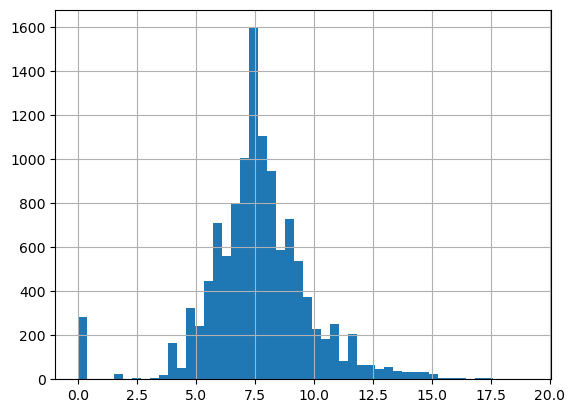

In [262]:
train_df.FuelConsumption.hist(bins=50)

In [263]:
train_df.FuelConsumption.isna().sum()

1334

Видим приличное количество значений 0 и близко к этому при расходе топлива - это не выброс , это иза электромобилей и гибридных авто

In [265]:
train_df[train_df.FuelConsumption.isna()].head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
7594,Mazda,2019.0,3,USED Dealer ad,2019 Mazda 3,USED,Automatic,-,Front,Unleaded,NaN,18664,Red / 2019/05,"Dandenong South, VIC",-,NaN,NaN,NaN,30990.0
12403,LDV,2020.0,V80,Qld 4x4 Pty Ltd,2020 LDV V80 HIGH ROOF LONG WHEEL,USED,Automatic,-,Other,Diesel,NaN,61972,White / -,"Baringa, QLD",-,Commercial,NaN,NaN,29999.0
15832,BMW,1975.0,2002,USED Dealer ad,1975 BMW 2002,USED,Automatic,-,Rear,Leaded,NaN,110306,Green / Cream Cloth,"Rozelle, NSW",-,NaN,NaN,NaN,39990.0
12387,Nissan,2015.0,Navara,Qld 4x4 Pty Ltd,2015 Nissan Navara ST,USED,Manual,-,Other,Diesel,NaN,169969,Black / -,"Baringa, QLD",-,Ute / Tray,NaN,NaN,29999.0
16690,Mercedes-Benz,2013.0,Sprinter,M & G Motors,2013 Mercedes-Benz Sprinter 313 CDI,USED,Automatic,-,Other,-,NaN,339589,White / -,"Braybrook, VIC",-,Commercial,NaN,NaN,19988.0


- Расмсмотрим в паре две признака - Engine и CylindersinEngine
Видно что они свзаны  между собой - первое занчение в Engine - это и есть значение CylindersinEngine

In [267]:
train_df[['Engine','CylindersinEngine']].head()

,Engine,CylindersinEngine
7594,-,-
10634,"4 cyl, 1.5 L",4 cyl
4411,"4 cyl, 2.2 L",4 cyl
12403,-,-
9982,"4 cyl, 2 L",4 cyl


In [268]:
(train_df.Engine.apply(lambda x: x.split(',')[0]) == train_df.CylindersinEngine).sum()

13242

Поэтому используем только второе значение у Engine

In [270]:
train_df.Engine

7594                -
10634    4 cyl, 1.5 L
4411     4 cyl, 2.2 L
12403               -
9982       4 cyl, 2 L
             ...     
11285    4 cyl, 2.5 L
11965               -
5391     4 cyl, 2.8 L
860        4 cyl, 2 L
15796               -
Name: Engine, Length: 13242, dtype: object

In [271]:
train_df.CylindersinEngine.value_counts()

CylindersinEngine
4 cyl     9184
6 cyl     1627
-         1319
8 cyl      444
5 cyl      315
3 cyl      258
0 L         85
12 cyl       5
2 cyl        3
10 cyl       1
2 L          1
Name: count, dtype: int64

- Для CylindersinEngine заменим на категорию с прочерком все цилиндры и значения которых мало меньше 86

Получим второе значение из признака Engine

<Axes: >

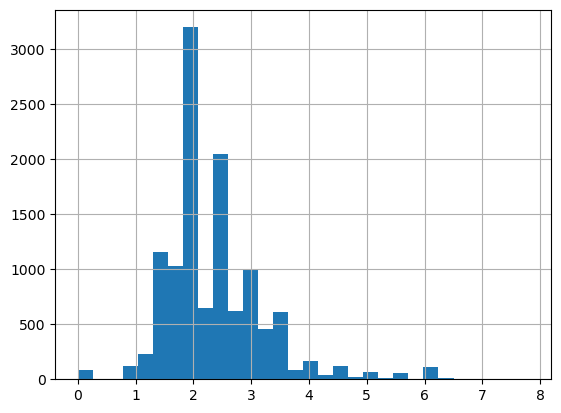

In [274]:
def extract_liters(value):
    match = re.search(r'(\d+\.?\d*) L', value)
    return float(match.group(1)) if match else np.nan
engine_vals = train_df.Engine.apply(extract_liters)
engine_vals.hist(bins=30)

In [275]:
engine_vals.isna().sum()

1320

In [276]:
engine_vals

7594     NaN
10634    1.5
4411     2.2
12403    NaN
9982     2.0
        ... 
11285    2.5
11965    NaN
5391     2.8
860      2.0
15796    NaN
Name: Engine, Length: 13242, dtype: float64

Опять же отталкиваясь от категории, если электричка то 0, если гибрид медиана среди гибридов все остальное медиана среди омтальных категорий 


Рассмотрим DriveType

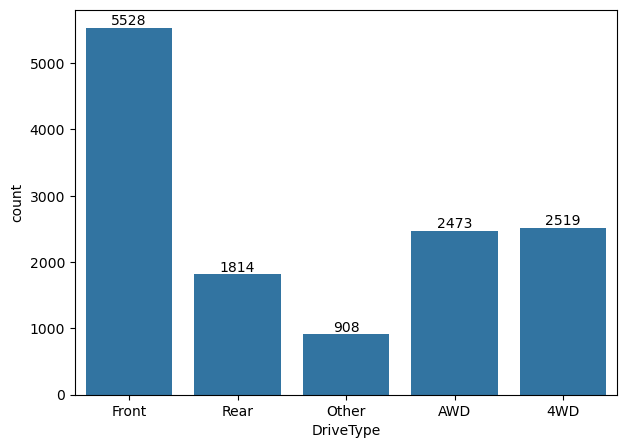

In [279]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data=train_df, x='DriveType')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Категориальная переменная без пропущенных и каких либо значений

Рассмотрим переменную ColourExtInt
Выберем первую часть цвета , несущую основную информацию

In [282]:
train_df.ColourExtInt.apply(lambda x: x.split(' / ')[0]).value_counts()

ColourExtInt
White        4765
Silver       1830
Grey         1820
Black        1542
Blue         1252
Red           887
-             310
5 years       204
Green         131
Brown         113
Gold          107
Orange         85
Yellow         64
3 years        48
6 years        22
7 years        20
4 years         8
Beige           8
Purple          8
Burgundy        7
Bronze          6
1 years         2
Pink            1
Cream           1
Turquoise       1
Name: count, dtype: int64

Категории у которых указывается все что связано с годом (не понятно почему) надо соберем в одну категорию Other

Рассмотрим признак который характеризует полное название авто, он в себе содержит части из столбцов таблицы рассмотренных ранее проверим есть ли что то еще информативное в нем
- Уберем первые три слова в описании - это в основном известная информация , посмотрим встречается лм еще что то часто похожее не признак, Обычно важна не только модель машины но и еще ее шильдик (sport,quattro)
- посмотрим, что в основном выводится после как дополнительные указания к модели

In [285]:
def remove_first_three_words(text):
    return ' '.join(text.split()[3:]) if len(text.split()) > 3 else ''

train_df['Title'].apply(remove_first_three_words)

7594                          
10634                     Maxx
4411     XL 2.2 HI-Rider (4X2)
12403     HIGH ROOF LONG WHEEL
9982                    Active
                 ...          
11285            Luxury Hybrid
11965                       MD
5391                 PRO (4X4)
860                        NEO
15796                   G10+21
Name: Title, Length: 13242, dtype: object

Видны уже известные категории по типу привода авто (4x4) и тд, также надо удалить знаечния через точку и числа просто, они не информативные это может быть например литраж двигателя который есть в другой переменной

In [287]:
def remove_words_in_parentheses(text):
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub(r'\b\d+\.\d+\b', '', text)
    text = re.sub(r'\b\d+', '', text)
    return text


temp = train_df['Title'].apply(remove_first_three_words)
temp = temp.apply(remove_words_in_parentheses)

all_words = ' '.join(temp).split()

word_counts = Counter(all_words)

top_words = word_counts.most_common(15)
print("Самые часто встречающиеся слова:")
for word, count in top_words:
    print(f"{word}: {count}")

Самые часто встречающиеся слова:
Sport: 791
S: 541
Active: 454
TSI: 425
Hybrid: 363
ST: 344
Ascent: 330
Seat: 276
GXL: 275
LS: 256
GT: 241
Tfsi: 225
Premium: 218
TDI: 217
Quattro: 217


In [288]:
list(map(lambda x: x[0],top_words))

['Sport',
 'S',
 'Active',
 'TSI',
 'Hybrid',
 'ST',
 'Ascent',
 'Seat',
 'GXL',
 'LS',
 'GT',
 'Tfsi',
 'Premium',
 'TDI',
 'Quattro']

будем использовать найденные катигории просто как дополнительные бинарные признаки (есть ли в строке Title (1) или нет(0))

- Рассмотрим Location

In [291]:
train_df.Location.value_counts()

Location
Minchinbury, NSW         426
Blacktown, NSW           224
Liverpool, NSW           212
Hoppers Crossing, VIC    183
Bentley, WA              170
                        ... 
Wellington, NSW            1
Coomera, QLD               1
West Tamworth, NSW         1
Collie, WA                 1
Goodwood, SA               1
Name: count, Length: 606, dtype: int64

In [292]:
df['Location'].str.split(', ').str[1].value_counts()

Location
NSW       6401
VIC       3871
QLD       2745
WA        1791
SA         800
ACT        381
TAS        214
NT          80
AU-VIC       1
Name: count, dtype: int64

AU-VIC можно добавить к VIC

In [294]:
train_df.FuelConsumption

7594     NaN
10634    4.9
4411     7.5
12403    NaN
9982     7.4
        ... 
11285    4.9
11965    NaN
5391     8.5
860      5.8
15796    NaN
Name: FuelConsumption, Length: 13242, dtype: float64

- Рассмотрим Doors

In [296]:
train_df.Doors.isna().sum()

1259

In [297]:
train_df.Doors.value_counts()

Doors
4 Doors     8898
5 Doors     2011
2 Doors      843
3 Doors      171
5 Seats       19
6 Seats        8
2 Seats        8
8 Seats        8
7 Seats        5
3 Seats        5
9 Seats        4
4 Seats        2
12 Seats       1
Name: count, dtype: int64

Необходимо удалить ощиблчные значения и заменить их модой и nan значения 

In [299]:
train_df.Seats.value_counts()

Seats
5 Seats     8998
7 Seats     1424
4 Seats      511
2 Seats      452
3 Seats      252
8 Seats      226
6 Seats       23
14 Seats       8
12 Seats       4
11 Seats       3
22 Seats       2
9 Seats        2
15 Seats       1
Name: count, dtype: int64

In [300]:
train_df.Seats.isna().sum()

1336

сделаем категорию 9+ seats туда собрать все категории где сидений больше чем 9 включительно 

Напишем свой класс наследник BaseEstimator и TransformerMixin который будет позволять обработать и трансформировать наши датасет

In [303]:
class PriceTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.non_numeric_values = None
    
    def fit(self, X, y=None):
        numeric_values = pd.to_numeric(X['Price'], errors='coerce')
        non_numeric_mask = pd.isnull(numeric_values)
        self.non_numeric_values = X['Price'][non_numeric_mask]
        return self
    
    def transform(self, X, y=None,drop_outlers=True):
        X_transformed = X.copy()
        
        if self.non_numeric_values is not None:
            X_transformed = X_transformed[~X_transformed.index.isin(self.non_numeric_values.index)]
        
        X_transformed['Price'] = pd.to_numeric(X_transformed['Price'], errors='coerce')
        if drop_outlers:
            Q1 = X_transformed['Price'].quantile(0.15)
            Q3 = X_transformed['Price'].quantile(0.85)
            IQR = Q3 - Q1
        
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
        
            X_transformed = X_transformed[(X_transformed['Price'] >= lower_bound) & (X_transformed['Price'] <= upper_bound)]    
       
        X_transformed = X_transformed[~X_transformed.Price.isnull()] 
        return X_transformed